## Consultar arquivos usando um pool de SQL sem servidor

# Provisionar um espaço de trabalho do Azure Synapse Analytics

Entre no portal do Azure em https://portal.azure.com.

No painel do PowerShell, insira manualmente os seguintes comandos para clonar este repositório:

In [ ]:
 rm -r dp203 -f
 git clone https://github.com/MicrosoftLearning/dp-203-azure-data-engineer dp203

In [ ]:
 cd dp203/Allfiles/labs/02
 ./setup.ps1

# Visualizar arquivos no data lake

Após a conclusão do script, no portal do Azure, acesse o grupo de recursos dp203-xxxxxxx que ele criou e selecione seu espaço de trabalho do Synapse.

Na página Visão geral do seu espaço de trabalho Synapse, no cartão Abrir Synapse Studio, selecione Abrir para abrir o Synapse Studio em uma nova guia do navegador; efetue login se solicitado.

Dentro do Synapse Studio conseguimos encontrar todos os arquivos

# Use SQL para consultar arquivos CSV

Selecione a pasta csv e, na lista Novo script SQL na barra de ferramentas

Observe que os resultados consistem em colunas denominadas C1, C2 e assim por diante. Neste exemplo, os arquivos CSV não incluem os cabeçalhos das colunas.

Embora seja possível trabalhar com os dados usando os nomes de colunas genéricos que foram atribuídos ou por posição ordinal, será mais fácil entender os dados se você definir um esquema tabular.

Para fazer isso, adicione uma cláusula WITH à função OPENROWSET, conforme mostrado aqui:

In [ ]:
 SELECT
     TOP 100 *
 FROM
     OPENROWSET(
         BULK 'https://datalakexxxxxxx.dfs.core.windows.net/files/sales/csv/',
         FORMAT = 'CSV',
         PARSER_VERSION='2.0'
     )
     WITH (
         SalesOrderNumber VARCHAR(10) COLLATE Latin1_General_100_BIN2_UTF8,
         SalesOrderLineNumber INT,
         OrderDate DATE,
         CustomerName VARCHAR(25) COLLATE Latin1_General_100_BIN2_UTF8,
         EmailAddress VARCHAR(50) COLLATE Latin1_General_100_BIN2_UTF8,
         Item VARCHAR(30) COLLATE Latin1_General_100_BIN2_UTF8,
         Quantity INT,
         UnitPrice DECIMAL(18,2),
         TaxAmount DECIMAL (18,2)
     ) AS [result]

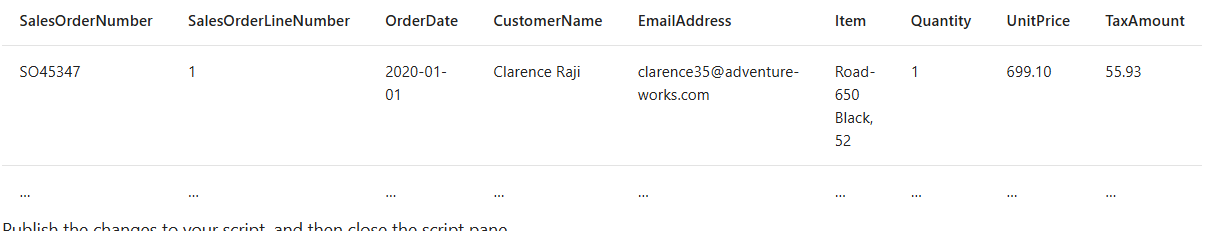

# Criar uma fonte de dados externa

Ao definir uma fonte de dados externa em um banco de dados, você pode usá-la para referenciar o local do data lake onde os arquivos estão armazenados.

No Synapse Studio, na página Desenvolver, no menu +, selecione Script SQL.

No novo painel de script, adicione o seguinte código (substituindo datalakexxxxxxx pelo nome da sua conta de armazenamento do data lake) para criar um novo banco de dados e adicionar uma fonte de dados externa a ele.

In [ ]:
 CREATE DATABASE Sales
   COLLATE Latin1_General_100_BIN2_UTF8;
 GO;

 Use Sales;
 GO;

 CREATE EXTERNAL DATA SOURCE sales_data WITH (
     LOCATION = 'https://datalakexxxxxxx.dfs.core.windows.net/files/sales/'
 );
 GO;

Retorne à página Dados e use o botão ↻ no canto superior direito do Synapse Studio para atualizar a página. Em seguida, visualize a aba Área de Trabalho no painel Dados, onde uma lista de bancos de dados SQL agora é exibida. Expanda essa lista para verificar se o banco de dados Vendas foi criado.

No menu … do banco de dados Vendas, selecione Novo script SQL > Script vazio. Em seguida, no painel Novo script, insira e execute a seguinte consulta:

In [ ]:
 SELECT *
 FROM
     OPENROWSET(
         BULK 'csv/*.csv',
         DATA_SOURCE = 'sales_data',
         FORMAT = 'CSV',
         PARSER_VERSION = '2.0'
     ) AS orders

A consulta usa a fonte de dados externa para se conectar ao data lake, e a função OPENROWSET agora só precisa referenciar o caminho relativo para os arquivos .csv.

Modifique o código da seguinte forma para consultar os arquivos parquet usando a fonte de dados.

In [ ]:
 SELECT *
 FROM
     OPENROWSET(
         BULK 'parquet/year=*/*.snappy.parquet',
         DATA_SOURCE = 'sales_data',
         FORMAT='PARQUET'
     ) AS orders
 WHERE orders.filepath(1) = '2019'

# Visualizar resultados da consulta

Analisar os resultados dessas consultas que foram feitas para obter insights sobre os dados.

o que você pode fazer facilmente usando a funcionalidade de gráficos integrada no editor de consultas do Synapse Studio.

Na página Desenvolver, crie uma nova consulta SQL vazia.

Certifique-se de que o script esteja conectado ao pool SQL integrado e ao banco de dados de vendas.

Insira e execute o seguinte código SQL:

In [ ]:
 SELECT YEAR(OrderDate) AS OrderYear,
        SUM((UnitPrice * Quantity) + TaxAmount) AS GrossRevenue
 FROM dbo.orders
 GROUP BY YEAR(OrderDate)
 ORDER BY OrderYear;

No painel Resultados, selecione Gráfico e visualize o gráfico criado para você, que deve ser um gráfico de linhas.

Altere a coluna Categoria para OrderYear para que o gráfico de linhas mostre a tendência da receita no período de três anos de 2019 a 2021:

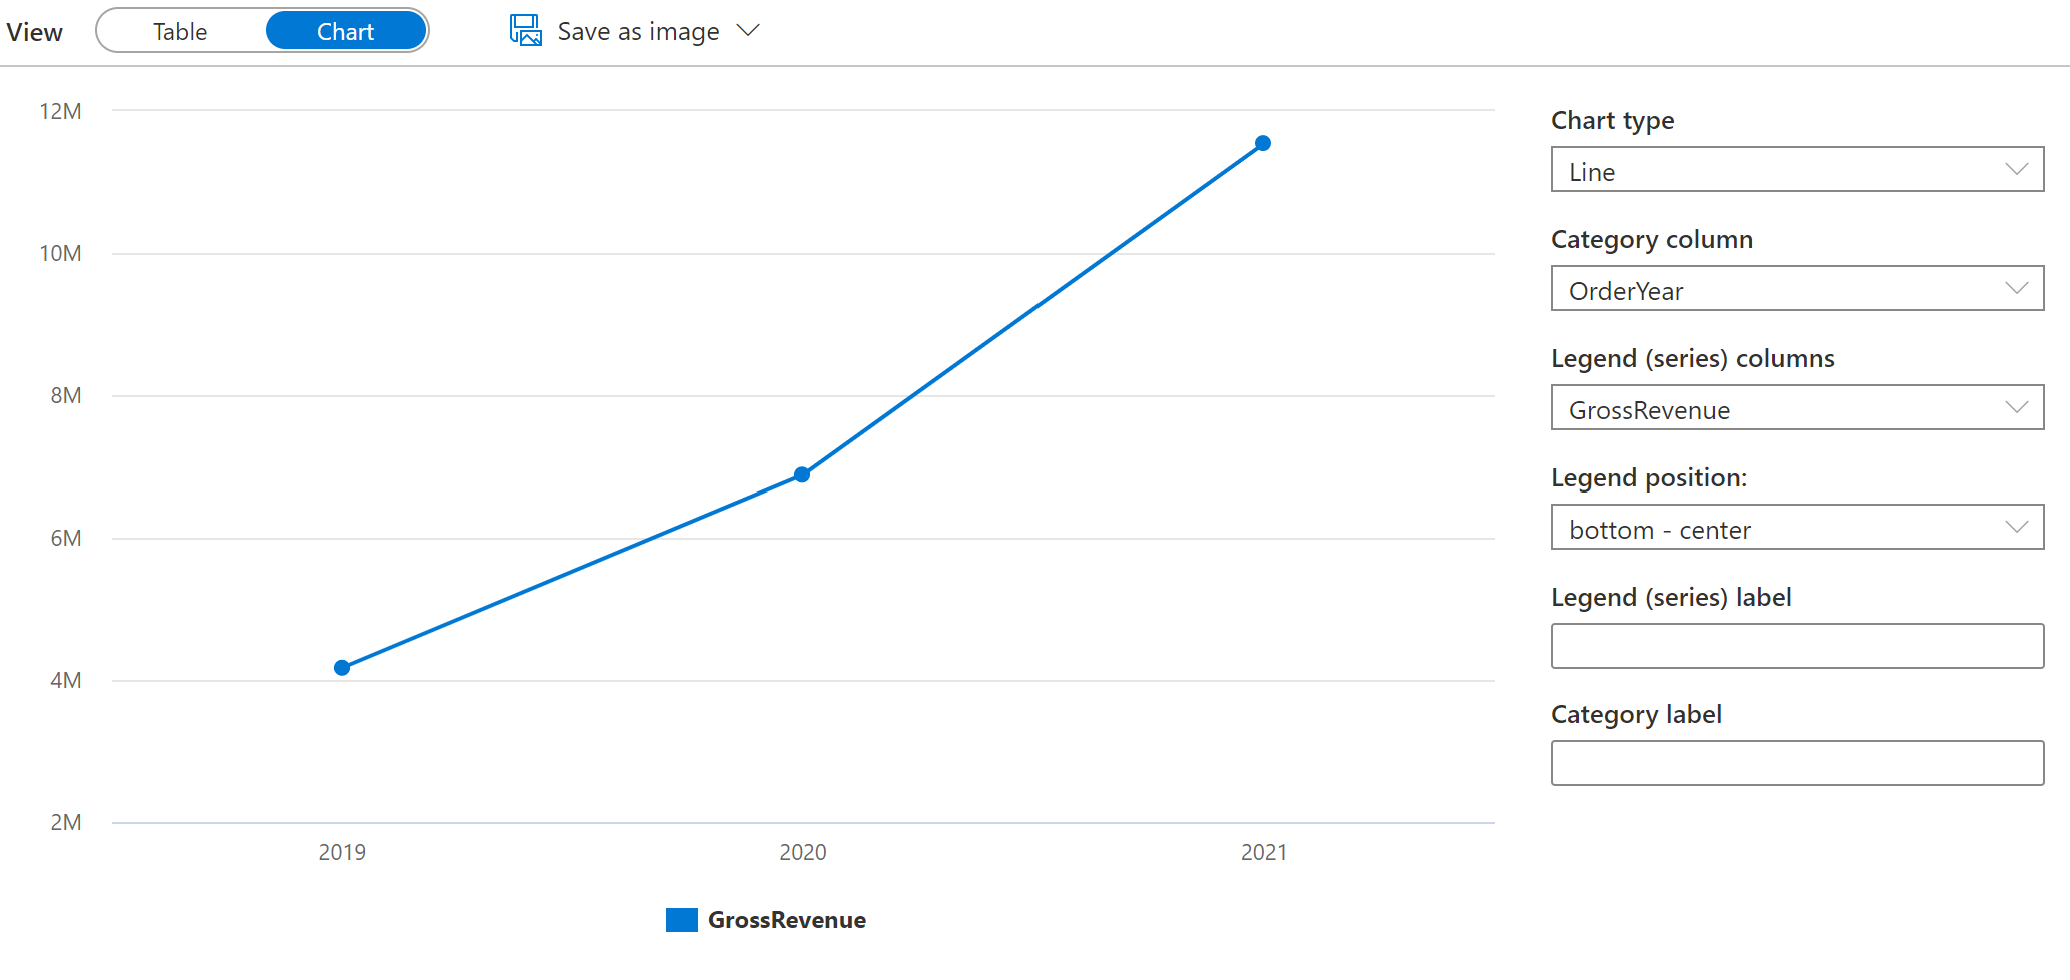

Alterne o tipo de gráfico para Coluna para ver a receita anual como um gráfico de colunas:

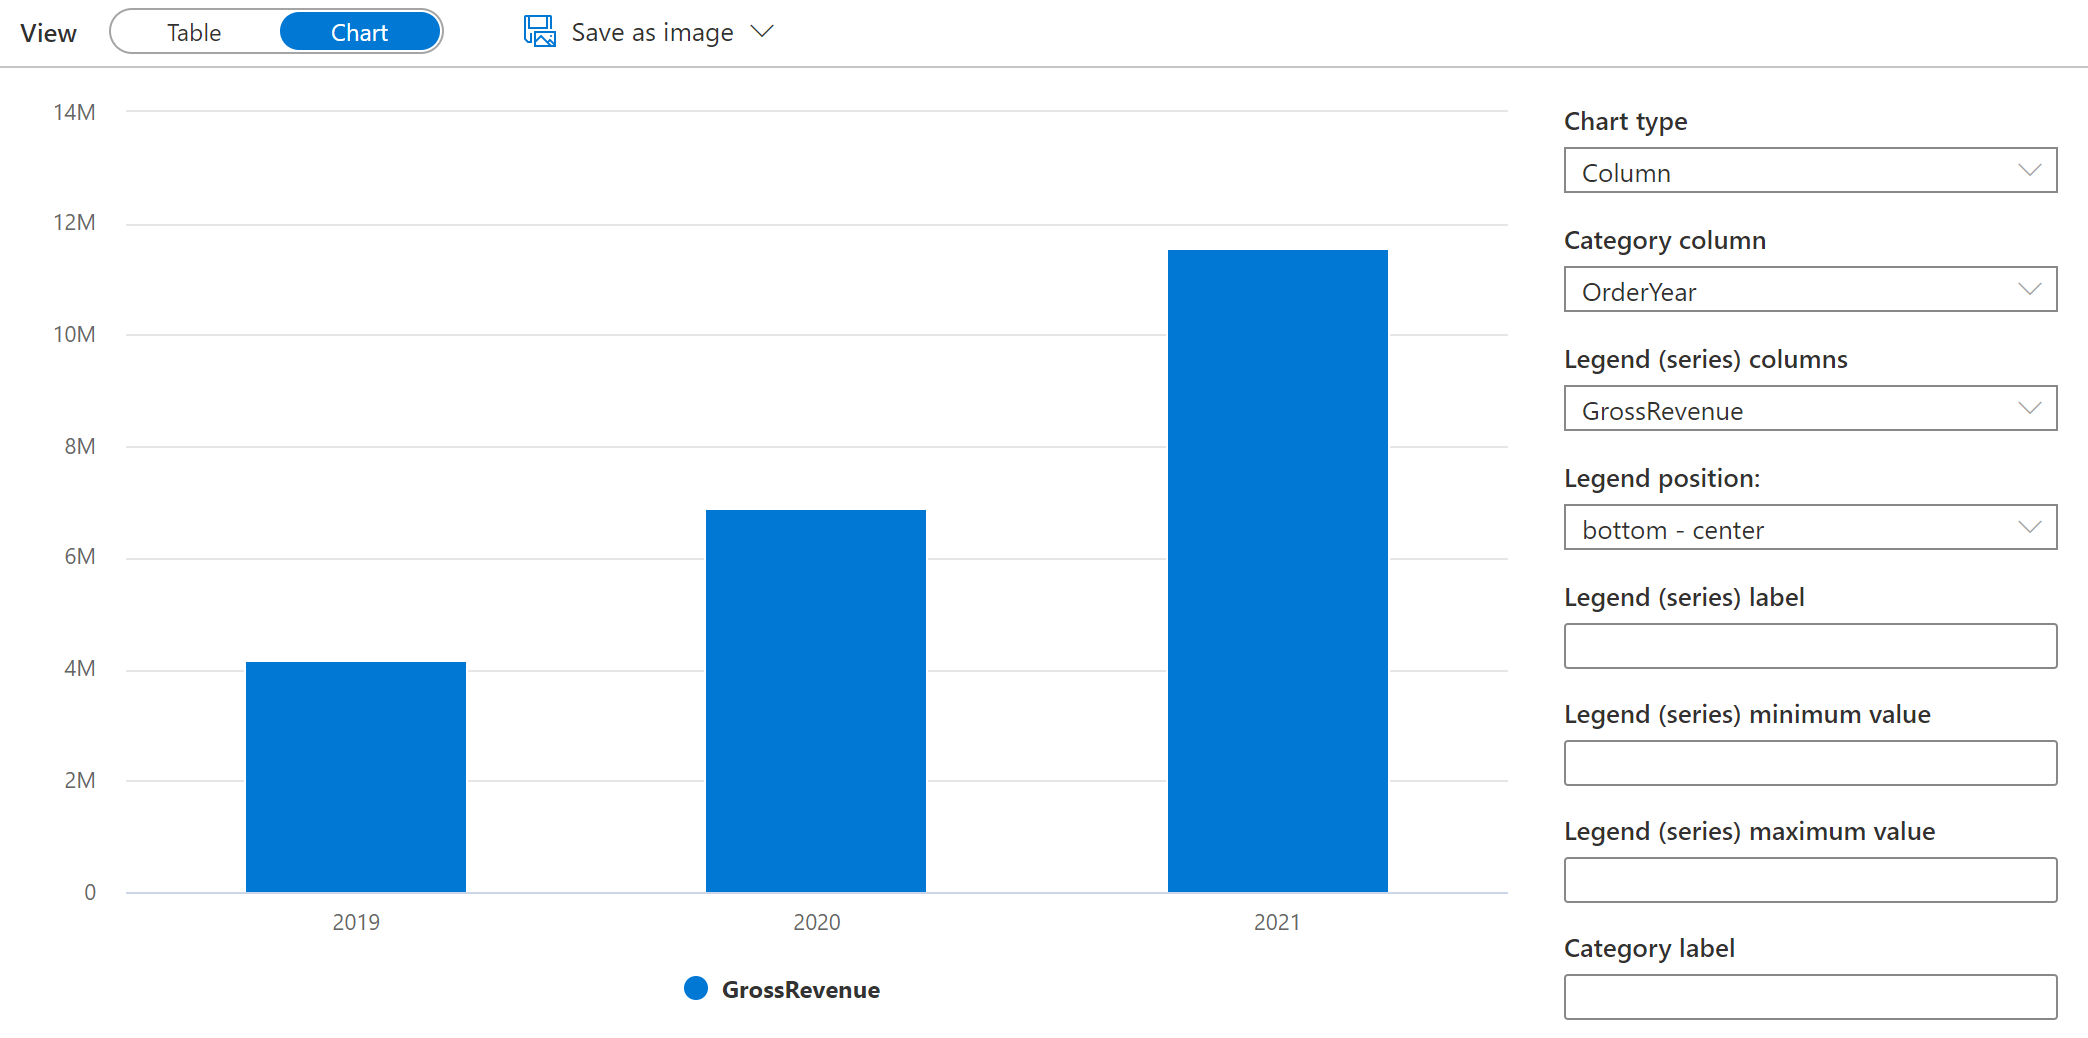